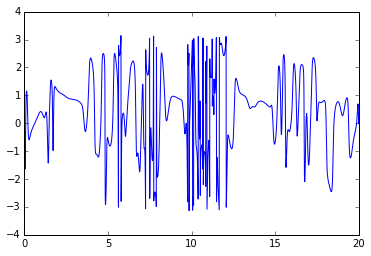

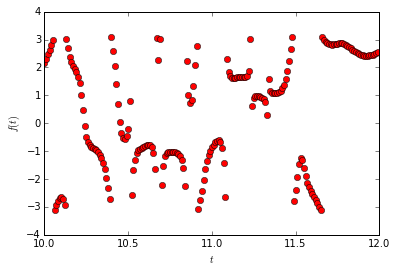

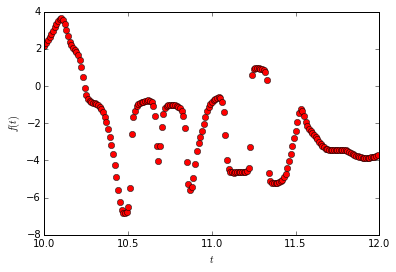

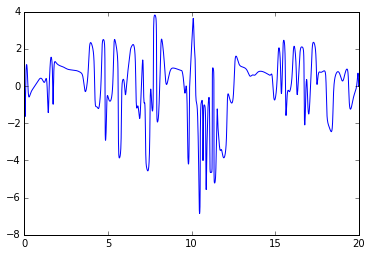

In [16]:
import sys
import numpy as np
import matplotlib.pyplot as pl
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
%matplotlib inline


if __name__=='__main__':

	"""
	kMul = 6
	dtime = .01
	iter = 10000

	kGoal = int(sys.argv[1])
	Tpulse = np.double(sys.argv[2])
	kWidGoal = int(sys.argv[3])

	init = iniData(kWidGoal = kWidGoal, dt = dtime, LoadFileIterNum=iter, knumload = 12*kMul+1, 
				knum=12*kMul+1, kPosGoal=kGoal, kPosGoalLoad=kGoal,
			 		T_pulse = Tpulse, ChooseFile = 'LOAD')

    ctrlc, ctrls = init.ctrl_c, init.ctrl_s
	#x, y = init.plot_At(init.ctrl_c, init.ctrl_s, tin = 0)
	"""
	
	
	loadname1 = 'xy.dat'
	data1 = np.loadtxt(loadname1)
	x = data1[:,0]
	y = data1[:,1]

	pl.plot(x,y)
#	pl.plot(x[NNi:NNf],y[NNi:NNf])
	pl.show()
    
	NNi = 1000
	NNf = 1200
	pl.plot(x[NNi:NNf],y[NNi:NNf],'ro')
#	pl.plot(x,ynew, '--')
	pl.xlabel('$t$')
	pl.ylabel('$f(t)$')
	pl.show()
    
    
	cut = 1.*np.pi
	for i in range(1,len(y)):
		if y[i]-y[i-1]>cut :#and abs(round(y[i-1]/np.pi)) == 1:
			y[i] = - 2*np.pi + y[i] 
		elif y[i]-y[i-1] < -cut:
			y[i] = 2*np.pi + y[i]
 
#	pl.plot(x[NNi:NNf],y[NNi:NNf],'ro')
#	pl.plot(x,ynew, '--')
	pl.xlabel('$t$')
	pl.ylabel('$f(t)$')
#	pl.show()
	pos = []
	for i in range(2,len(y)):
		if (y[i]-y[i-1] )*(y[i-1] - y[i-2]) < -.5:
			pos.append(i)
			#y[i] = 2 * np.pi + y[i] #- (y[i]+2*np.pi) 
#			print i-1, y[i-1]
#	print pos
#	print y
#	print sum(y)/len(y), sum(x)/len(x)
#	x -= sum(x)/len(x)
#	y -= sum(y)/len(y)
#	print pos[1], pos[-1]
	y[pos[1]:pos[-2]] = y[pos[1]:pos[-2]] + 2*np.pi
	#window = 21
	#poly = 2
	#y = savgol_filter(y, window, poly)

	lon = len(y)
#	print lon
	pl.plot(x[NNi:NNf],y[NNi:NNf],'ro')
#	pl.plot(x,ynew, '--')
	pl.xlabel('$t$')
	pl.ylabel('$f(t)$')
	pl.show()
    
	pl.plot(x,y)
#	pl.plot(x[NNi:NNf],y[NNi:NNf])
	pl.show()
#!!!	y = np.append(y,np.zeros(lon))

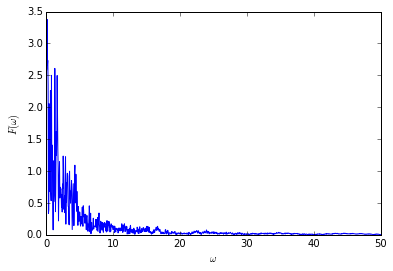

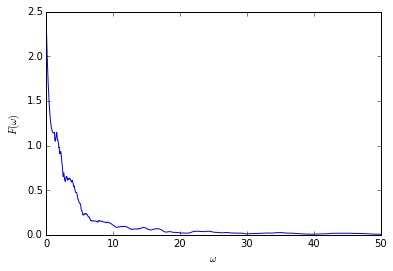

In [18]:
	dt = .01
	xf = np.fft.rfftfreq(lon, dt)#*2*np.pi
	yf = (np.fft.rfft(y))*dt/2
#	print len(y), len(yf)
	yf2 = (abs(yf))**2
	hbd = max(yf2)
	#yff = [yf[i] if yf2[i]>.01*hbd else 0 for i in range(len(yf))]
	#yff = [yf[i] for i in range(len(yf)) if yf2[i]>.01*hbd]
	#xff = [xf[i] for i in range(len(yf)) if yf2[i]>.01*hbd]
	window = 51 
	poly = 3 
	yffabs = savgol_filter(abs(yf), window, poly)
	yff = yffabs * yf/abs(yf)
#	yff = yf
	
	#yffr = savgol_filter(yf.real, window, poly)
	#yffi = savgol_filter(yf.imag, window, poly)
	#yff = yffr+1j*yffi
	pl.plot(xf[:], np.absolute(yf[:]))
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
	pl.xlim([0,50])
	pl.show()
    
	pl.plot(xf[:], np.absolute(yff[:]))
	#pl.plot(xf[:], np.imag(yff[:]))
#	pl.semilogx(xf[:],yf[:])
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
#	pl.xlim((-15,15))
	pl.show()	

[ 2.00054776  2.29615233] [-0.06695289  0.30628868]


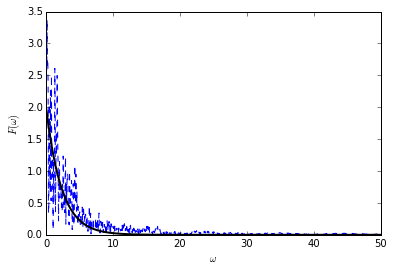

In [14]:
	func2 = lambda xdata, a, s : a * np.exp(-abs(xdata/s)**1)
	func = lambda xdata, a, s: a* np.exp(-(xdata/s)**2)
#	print len(yf)
	fbd = 50#len(yf)
	popt2, pcov2 = curve_fit(func2, xf[:fbd], np.double(abs(yf[:fbd])))
	print popt2, sum(pcov2)
	y2 = func2(xf, popt2[0], popt2[1])
	y2 = y2 * yf/abs(yf)
	pl.plot(xf,abs(yf),'--')
	pl.plot(xf,abs(y2),'k', linewidth = 2.)# *yff/abs(yff))
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
	pl.show()


2000 2000


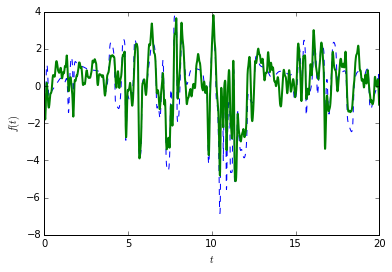

In [4]:
	xi = np.fft.rfftfreq(2*lon-1, (xf[1]-xf[0])/2)
	yi = np.fft.irfft(yff)*2/dt
	y2i = np.fft.irfft(y2)*2/dt
	print len(xi), len(yi)
	pl.plot(x,y,'--')
	#pl.plot(x, yi, 'k',linewidth = 2.0)
	pl.plot(x, y2i, 'g', linewidth = 2.)
	pl.xlabel('$t$')
	pl.ylabel('$f(t)$')
	pl.show()
#	print [i for i in y2i/abs(y2i)]
#	print sum([1 for i in y2i if i>0 ])
#	print sum([-1 for i in y2i if i<=0 ])

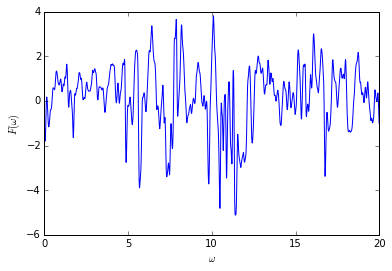

In [5]:
	savename = 'xiyi.dat'
	np.savetxt(savename,np.column_stack((x,y2i)))

	loadname2 = 'xiyi.dat'
	data2 = np.loadtxt(loadname2)

	xl = data2[:,0]
	yl = data2[:,1]

	pl.plot(xl,yl)
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
	pl.show()
    
    

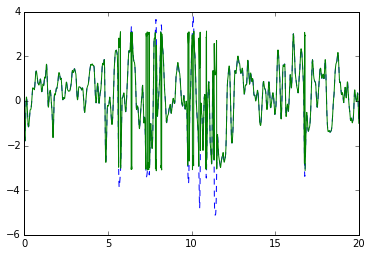

In [6]:
	"""
	xlf = np.fft.rfftfreq(lon, dt)#*2*np.pi
	ylf = (np.fft.rfft(yl))*dt
	pl.plot(xlf,abs(ylf))
	pl.show()
	"""
	ycos, ysin = np.cos(yl), np.sin(yl)
	yexp = ycos + 1j * ysin
	yy  = np.real(-1j*np.log(yexp))
	pl.plot(xl, yl, '--')
	pl.plot(xl, yy) 
	pl.show()

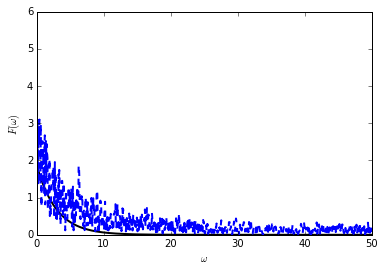

In [7]:
	xxf = np.fft.rfftfreq(lon, dt)#*2*np.pi
	yyf = (np.fft.rfft(yy))*dt
	pl.plot(xf, abs(y2),"k", linewidth = 2.)
	pl.plot(xxf,abs(yyf),"--",linewidth = 2.)
	pl.xlabel('$\omega$')
	pl.ylabel('$F(\omega)$')
	pl.show()

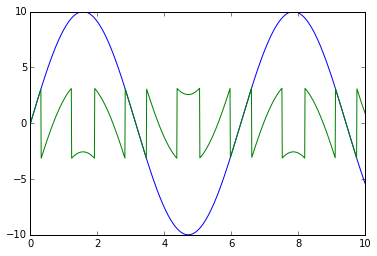

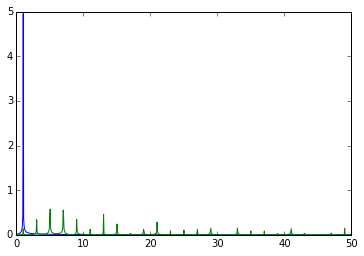

In [8]:
TT = 100
dtt = .01
tt = np.linspace(0, TT, int(TT/dtt))
yy = 10*np.sin(1*tt)# + 3 * np.sin(3*tt)
zz = np.real(-1j*np.log(np.cos(yy) +1j*np.sin(yy)))
pl.xlim([0,10])
pl.plot(tt,yy)
pl.plot(tt,zz)
pl.show()


ttfr = np.fft.rfftfreq(len(yy), dtt) * 2*np.pi
yyfr = np.fft.rfft(yy)*dtt/TT
zzfr = np.fft.rfft(zz)*dtt/TT
pl.plot(ttfr,abs(yyfr))
pl.plot(ttfr,abs(zzfr))
pl.xlim([0,50])
pl.show()

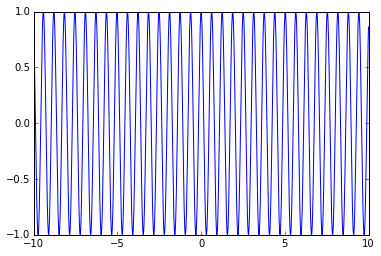

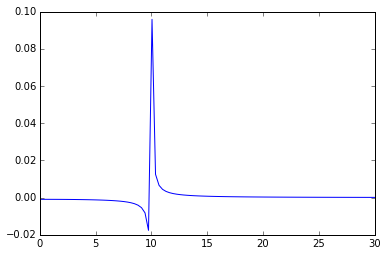

In [42]:
ts = np.linspace(-10,10,20*100)
sd = 1.
fs = np.cos(10*ts)#ts / ((1/sd)**2 - ts**2)
pl.plot(ts, fs)
pl.xlim([-10,10])
pl.show()


tsw = np.fft.rfftfreq(len(fs), dtt) * 2*np.pi
fsw = np.fft.rfft(fs)*dtt/TT
pl.plot(tsw, fsw)
pl.xlim([0,30])
pl.show()